In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop,SGD
import numpy as np
import cv2
import os
from os import listdir
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
from numpy import asarray
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [64]:
#preparing training datasets
x_train=[]
y_train=[]
path1=('C:/Users/ENVY/Desktop/Covid19-dataset/train/Covid/*.*')
for img in glob.glob(path1):
    #print(img)
    a=cv2.imread(img)        #reading images in numpy array
    a=cv2.resize(a,(200,200)) #resize the images to be in the same shape
    x_train.append(a/255)         #append all the images in the x_train dataset
    y_train.append(1)         #assign value of 0 to y_train
    
path2=('C:/Users/ENVY/Desktop/Covid19-dataset/train/Normal/*.*')
for img in glob.glob(path2):
    #print(img)
    a=cv2.imread(img)          #reading images in numpy array
    a=cv2.resize(a,(200,200)) #resize the images to be in the same shape
    x_train.append(a/255)         #append all the images in the x_train dataset
    y_train.append(0)         #assign value of 0 to y_train 


#preparing testing dataset

x_test=[]
y_test=[]
path3=('C:/Users/ENVY/Desktop/Covid19-dataset/test/Covid/*.*')
for img in glob.glob(path3):
    #print(img)
    a=cv2.imread(img)        #reading images in numpy array
    a=cv2.resize(a,(200,200)) #resize the images to be in the same shape
    x_test.append(a/255)         #append all the images in the x_train dataset
    y_test.append(1)         #assign value of 0 to y_train
    
path4=('C:/Users/ENVY/Desktop/Covid19-dataset/test/Normal/*.*')
for img in glob.glob(path4):
    #print(img)
    a=cv2.imread(img)          #reading images in numpy array
    a=cv2.resize(a,(200,200)) #resize the images to be in the same shape
    x_test.append(a/255)         #append all the images in the x_train dataset
    y_test.append(0)         #assign value of 0 to y_train 

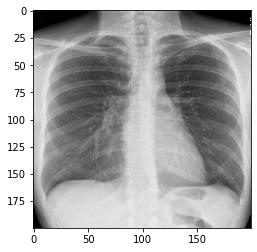

In [88]:
plt.imshow(x_train[90])

In [65]:
#convert to an array
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [66]:
len(x_train)

181

In [67]:
print(x_test)

[[[[0.97647059 0.97647059 0.97647059]
   [0.94901961 0.94901961 0.94901961]
   [0.94901961 0.94901961 0.94901961]
   ...
   [0.76862745 0.76862745 0.76862745]
   [0.76862745 0.76862745 0.76862745]
   [0.78039216 0.78039216 0.78039216]]

  [[0.18823529 0.18823529 0.18823529]
   [0.12941176 0.12941176 0.12941176]
   [0.11764706 0.11764706 0.11764706]
   ...
   [0.02352941 0.02352941 0.02352941]
   [0.01960784 0.01960784 0.01960784]
   [0.01568627 0.01568627 0.01568627]]

  [[0.01960784 0.01960784 0.01960784]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.03137255 0.03137255 0.03137255]
   [0.03137255 0.03137255 0.03137255]
   [0.02352941 0.02352941 0.02352941]]

  [[0.02352941 0.02352941 0.02352941]
   [0.0

In [68]:
#changing datatype
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [82]:
# Create a model with dropout
drop=0.2

#instantiate a CNN model

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu',input_shape=(200, 200, 3)))
model1.add(MaxPooling2D((2, 2)))
#model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
#model1.add(Dropout(drop))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(256, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(512, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

# model1.add(Conv2D(150, (3, 3), activation='relu'))
# model1.add(MaxPooling2D((2, 2)))
# model1.add(Dropout(drop))


model1.add(Flatten())

model1.add(Dense(32, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.add(Dropout(drop))
opt1 = SGD(lr=0.001, momentum=0.9)
# opt2 = RMSprop(lr=0.001, decay=1e-6)
#opt3='adam'
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 23, 23, 128)     

In [83]:
#fitting the model
model=model1.fit(x_train,y_train,
                batch_size=5,
                epochs=100,
                validation_data=(x_test,y_test))

Epoch 1/100
37/37 [==============================] - 15s 343ms/step - loss: 2.4465 - accuracy: 0.5580 - val_loss: 0.6930 - val_accuracy: 0.5652
Epoch 2/100
37/37 [==============================] - 13s 338ms/step - loss: 2.1829 - accuracy: 0.5635 - val_loss: 0.6938 - val_accuracy: 0.4348
Epoch 3/100
37/37 [==============================] - 12s 335ms/step - loss: 2.2840 - accuracy: 0.6188 - val_loss: 0.6932 - val_accuracy: 0.4348
Epoch 4/100
37/37 [==============================] - 12s 338ms/step - loss: 2.4147 - accuracy: 0.5635 - val_loss: 0.6940 - val_accuracy: 0.4348
Epoch 5/100
37/37 [==============================] - 12s 338ms/step - loss: 1.5479 - accuracy: 0.6630 - val_loss: 0.6932 - val_accuracy: 0.4348
Epoch 6/100
37/37 [==============================] - 12s 326ms/step - loss: 2.1888 - accuracy: 0.5580 - val_loss: 0.6937 - val_accuracy: 0.4348
Epoch 7/100
37/37 [==============================] - 12s 324ms/step - loss: 2.4597 - accuracy: 0.5967 - val_loss: 0.6935 - val_accuracy:

37/37 [==============================] - 12s 327ms/step - loss: 6.1706 - accuracy: 0.5967 - val_loss: 6.6301 - val_accuracy: 0.5652
Epoch 58/100
37/37 [==============================] - 12s 328ms/step - loss: 6.2549 - accuracy: 0.5912 - val_loss: 6.6301 - val_accuracy: 0.5652
Epoch 59/100
37/37 [==============================] - 12s 337ms/step - loss: 6.8475 - accuracy: 0.5525 - val_loss: 6.6301 - val_accuracy: 0.5652
Epoch 60/100
37/37 [==============================] - 12s 333ms/step - loss: 7.5264 - accuracy: 0.5083 - val_loss: 6.6301 - val_accuracy: 0.5652
Epoch 61/100
37/37 [==============================] - 12s 327ms/step - loss: 6.5096 - accuracy: 0.5746 - val_loss: 6.6301 - val_accuracy: 0.5652
Epoch 62/100
37/37 [==============================] - 12s 323ms/step - loss: 6.8505 - accuracy: 0.5525 - val_loss: 6.6301 - val_accuracy: 0.5652
Epoch 63/100
37/37 [==============================] - 12s 326ms/step - loss: 6.5086 - accuracy: 0.5746 - val_loss: 6.6301 - val_accuracy: 0.565

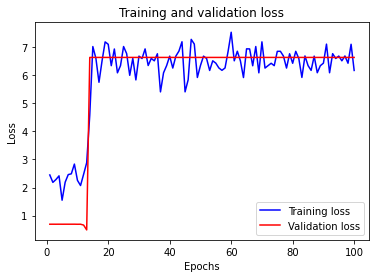

In [84]:
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

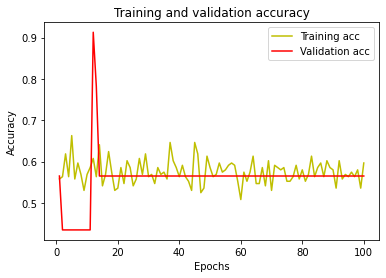

In [85]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
# model_pred=model1.predict(x_test)
# cm=confusion_matrix(y_test,model_pred)
# sns.heatmap(cm)